# Ground Truths

Testing obtaining hole dimensions from the ground truth masks generated by ImageJ.
Probably better to use `format_roi_csv.py`. It's probably more accurate since it takes
the dimensions directly from the ellipse selections in ImageJ. In contrast, this
just uses various algorithms to extract ellipses from the masks.

In [2]:
import sys
sys.path.insert(0, "../ellipsefinder/")

from find_ellipses import *
import matplotlib.pyplot as plt
import time

# Image `a90l90-002_gt_outer.tif`
## Basic Algorithm

In [3]:
filename = "../images/a90l90__q002/a90l90__q002_gt_outer.tiff"

def filter_res(res: pd.DataFrame, reset_index=True):
    cond = res["eccentricity"] < 0.3

    # Minimum diameter
    # cond &= res["x diameter"] >= 15
    # cond &= res["y diameter"] >= 15

    # Maximum diameter
    # cond &= res["x diameter"] <= 200
    # cond &= res["y diameter"] <= 200

    res = res.query("@cond")
    return res.reset_index(drop=True) if reset_index else res

start = time.time()

# Load image
original = cv2.imread(filename)

pre, img, res = Basic(
    original,
    -10,
    sort="x",
    filter=filter_res,
    # region=(None, 686),
    # show_contours=True,
    # _no_pre = True,
).run()

save_image(filename, pre, "_pre")
save_image(filename, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
# calculate_parameters(filename, res, ".txt")
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
# print(get_pixel_size(filename, ".txt"), "nm/px")
res

Time elapsed: 0.27 seconds


,x center,y center,x diameter,y diameter,angle,eccentricity
0,30.5,231.5,54.202690,54.202690,-0.0,0.000000
1,120.5,231.5,52.281651,52.281651,-0.0,0.000000
2,207.5,233.0,53.093594,54.581886,-90.0,0.115964
3,293.0,235.0,51.476585,51.476585,-0.0,0.000000
4,372.5,236.0,51.236431,52.040833,-90.0,0.087572
5,457.0,236.0,51.462379,53.088779,-90.0,0.122813
6,544.0,238.5,52.943668,54.629162,-0.0,0.123242


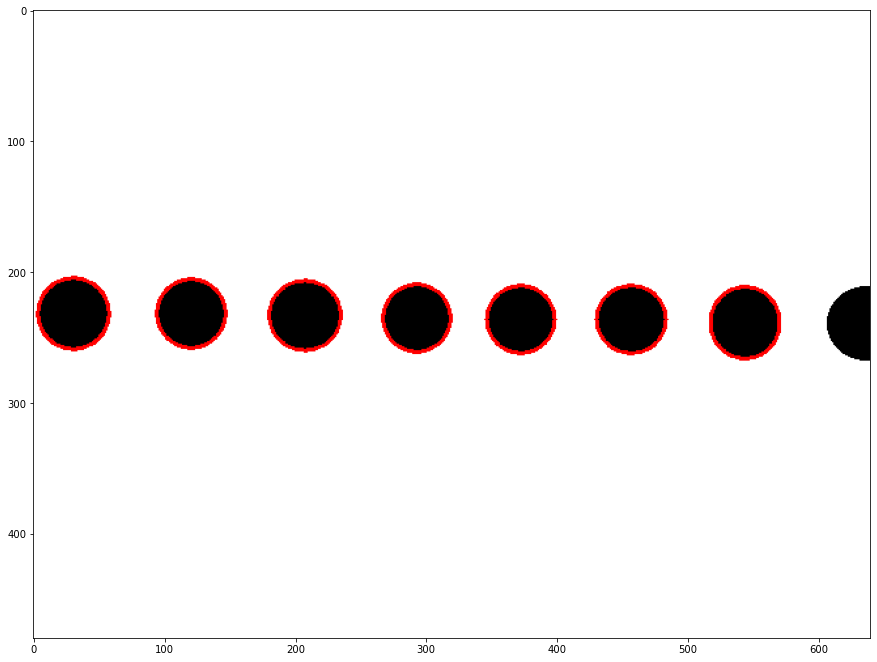

In [4]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img, cmap="gray")

## AAMED Algorithm

In [5]:
filename = "../images/a90l90__q002/a90l90__q002_gt_outer.tiff"

start = time.time()

# Load image
original = cv2.imread(filename)

pre, img, res = AAMED(
    original,
    500,
    700,
    sort="x",
).run()

save_image(filename, pre, "_pre")
# calculate_parameters(filename, res, ".txt")
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
# print(get_pixel_size(filename, ".txt"), "nm/px")
res

Time elapsed: 0.18 seconds


,x center,y center,x diameter,y diameter,angle,P score,eccentricity
0,30.455496,231.461609,53.832153,53.880875,-1.568533,0.966771,0.021259
1,120.455521,231.461578,51.845936,51.892593,-1.644821,0.964041,0.021198
2,207.406738,232.962219,52.780205,54.043819,-89.933701,0.965636,0.107489
3,292.898621,234.903870,50.984238,51.034588,-2.085523,0.968307,0.022204
4,372.465851,235.961456,50.828186,51.613777,-89.893730,0.964975,0.086904
5,456.966370,235.911118,50.934780,52.710358,-89.946152,0.965884,0.128682
6,543.955627,238.411346,52.731197,54.097923,-0.058350,0.967937,0.111680
7,636.352722,238.778152,56.531101,59.760212,-83.668129,0.957709,0.162134


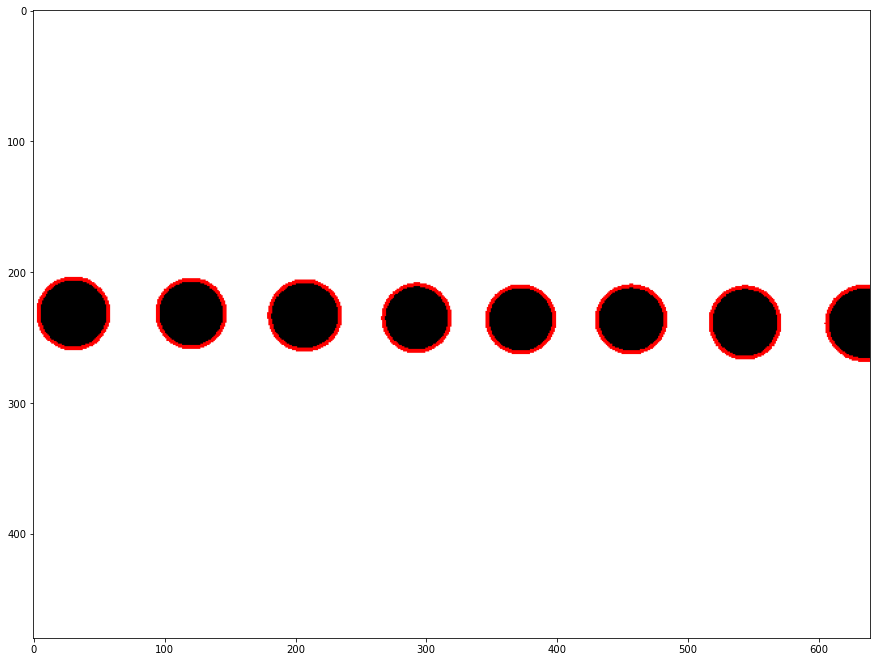

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img, cmap="gray")

# Image `a90l90-003_gt.tiff`
## Basic Algorithm

In [7]:
filename = "../images/a90l90__q003/a90l90__q003_gt.tiff"

def filter_res(res: pd.DataFrame, reset_index=True):
    cond = res["eccentricity"] < 0.3

    # Minimum diameter
    # cond &= res["x diameter"] >= 15
    # cond &= res["y diameter"] >= 15

    # Maximum diameter
    # cond &= res["x diameter"] <= 200
    # cond &= res["y diameter"] <= 200

    res = res.query("@cond")
    return res.reset_index(drop=True) if reset_index else res

start = time.time()

# Load image
original = cv2.imread(filename)

pre, img, res = Basic(
    original,
    -10,
    sort="x",
    filter=filter_res,
    # region=(None, 686),
    # show_contours=True,
    # _no_pre = True,
).run()

save_image(filename, pre, "_pre")
save_image(filename, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
# calculate_parameters(filename, res, ".txt")
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
# print(get_pixel_size(filename, ".txt"), "nm/px")
res

Time elapsed: 0.30 seconds


,x center,y center,x diameter,y diameter,angle,eccentricity
0,22.026682,220.981903,17.929369,18.489408,-6.335176,0.122129
1,47.000000,221.500000,17.370117,18.266365,-90.000000,0.154696
2,71.500000,221.500000,17.319975,17.839945,-0.000000,0.119837
3,96.000000,221.500000,17.370117,18.266365,-90.000000,0.154696
4,120.518768,222.524719,17.296879,17.799269,-6.981515,0.117955
5,145.500000,222.500000,17.319975,17.839945,-0.000000,0.119837
6,170.481232,222.475281,17.296879,17.799269,-6.981515,0.117955
7,194.518768,223.524719,17.296879,17.799269,-6.981515,0.117955
8,219.532730,223.485657,17.399940,17.831205,-6.769712,0.109301
9,243.051529,224.000000,16.522755,16.588310,-0.000000,0.044408


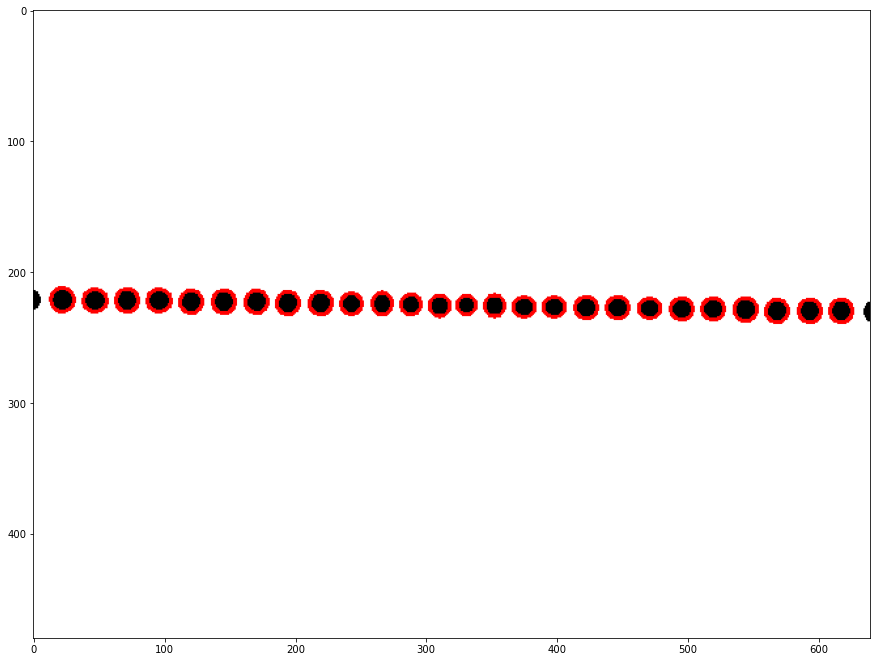

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img, cmap="gray")

## AAMED Algorithm

In [10]:
filename = "../images/a90l90__q003/a90l90__q003_gt.tiff"

start = time.time()

# Load image
original = cv2.imread(filename)

pre, img, res = AAMED(
    original,
    1000,
    1000,
    sort="x",
).run()

save_image(filename, pre, "_pre")
# calculate_parameters(filename, res, ".txt")
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
# print(get_pixel_size(filename, ".txt"), "nm/px")
res

Time elapsed: 0.45 seconds


,x center,y center,x diameter,y diameter,angle,P score,eccentricity


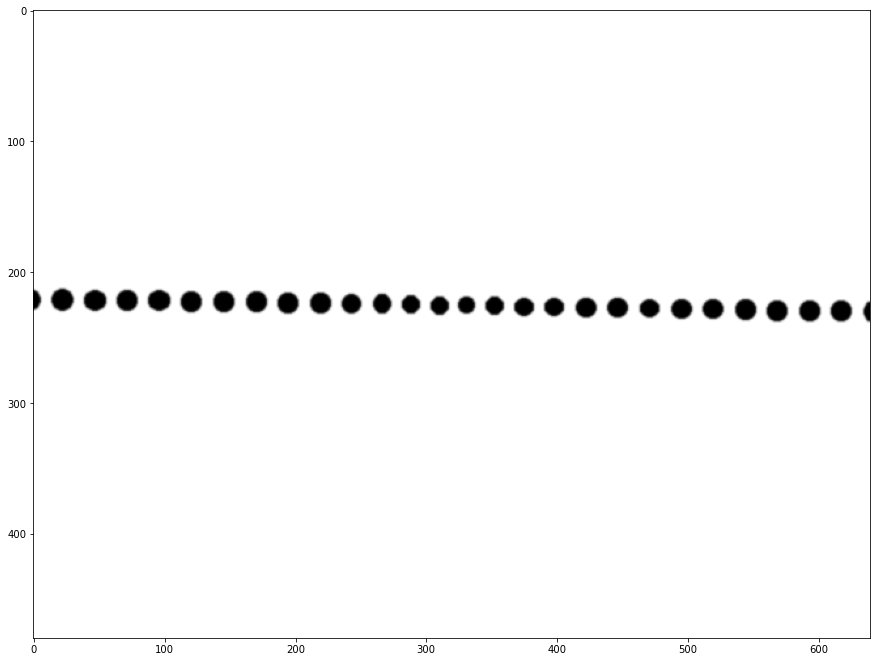

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(pre, cmap="gray")

# Image `a90l90-001_gt.tiff`
## Basic Algorithm

In [12]:
filename = "../images/a90l90__q001/a90l90__q001_gt.tiff"

start = time.time()

# Load image
original = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

pre, img, res = Basic(
    ~original,
    sort="x",
    # filter=filter_res,
    # region=(None, 686),
    # show_contours=True,
    _no_pre = True,
).run()

save_image(filename, pre, "_pre")
save_image(filename, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
# calculate_parameters(filename, res, ".txt")
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
# print(get_pixel_size(filename, ".txt"), "nm/px")
res

Time elapsed: 0.07 seconds


,x center,y center,x diameter,y diameter,angle,eccentricity
0,185.0,217.5,3.246952,4.248751,-90.0,0.322482
1,192.0,217.5,3.246952,4.248751,-90.0,0.322482
2,198.5,217.5,3.162278,3.162278,-0.0,0.000000
3,205.5,217.5,3.162278,3.162278,-0.0,0.000000
4,213.0,217.5,3.246952,4.248751,-90.0,0.322482
5,219.5,217.5,3.162278,3.162278,-0.0,0.000000
6,226.5,217.5,3.162278,3.162278,-0.0,0.000000
7,233.5,217.5,3.162278,3.162278,-0.0,0.000000
8,240.5,217.5,3.162278,3.162278,-0.0,0.000000
9,247.0,217.5,3.246952,4.248751,-90.0,0.322482


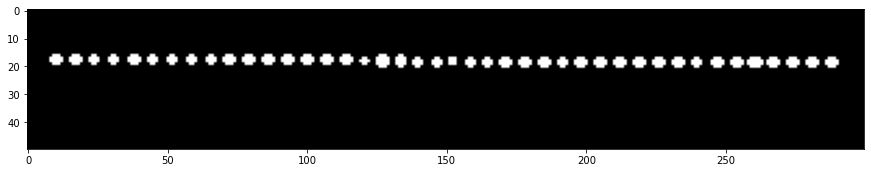

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(pre[200:250, 175:475], cmap="gray")

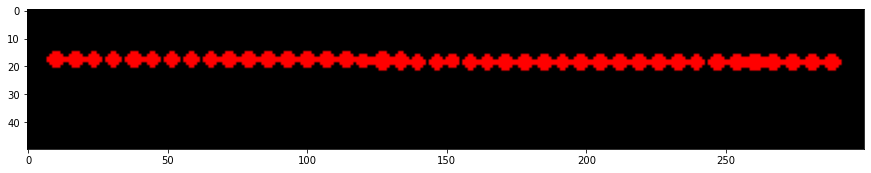

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img[200:250, 175:475], cmap="gray")